<a href="https://colab.research.google.com/github/CarlosGG18/Post-Disaster-Semenatic-Segmentation/blob/main/Unet_Untuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 5.9 MB/s eta 0:00:00


In [ ]:
import h5py
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2
import os
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
import random
import segmentation_models as sm
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape,Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D,concatenate
from keras.layers.convolutional.conv2d_transpose import Conv2DTranspose
import matplotlib

Segmentation Models: using `keras` framework.


## Print out test image and test for dimension sizes

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/Floodnet/train/train-org-img/10687.jpg')

#Display 

# plt.imshow(img)
# plt.axis()
# plt.show()

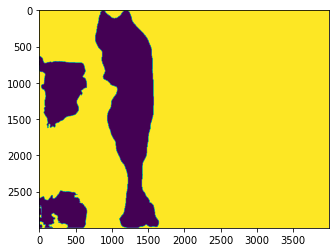

In [ ]:
# Diplay mask for same image

mask_img= mpimg.imread('/content/drive/MyDrive/Floodnet/train/train-label-img/10687_lab.png')
plt.imshow(mask_img)
plt.axis()
plt.show()

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/Floodnet')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Floodnet'

In [ ]:
training_img_path = os.getcwd() + '/train/train-org-img'
training_img_path

'/content/drive/MyDrive/Floodnet/train/train-org-img'

In [ ]:
images= os.listdir(training_img_path)


In [ ]:
len(images)

1445

In [ ]:
patch_size=256
img_height = 3000
img_width = 4000
n_classes= 10

In [ ]:
train_grid_size = 256
height = train_grid_size
width = train_grid_size
resize_dim = (2*train_grid_size, 2*train_grid_size)


In [ ]:
h_n = int(resize_dim[0]/height)
w_n = int(resize_dim[0]/width)
h_n


2

In [ ]:
train_floodnet_images =[]
for img_path in images:
  img = cv2.imread("/".join((training_img_path, img_path)),1)
  img = img[0:img_height, 0:img_width,:]
  img = cv2.resize(img, resize_dim)
  i = 0
  j = 0
  y = 0

  for i in range(h_n):
        x=0
        for j in range(w_n):
            img_crop = img[y:(y+height), x:(x+width), :]
            train_floodnet_images.append(img_crop)
            x+=width
        y+=height
train_floodnet_images = np.array(train_floodnet_images)


In [ ]:
train_floodnet_images[1].shape

(256, 256, 3)

In [ ]:
len(train_floodnet_images)

5780

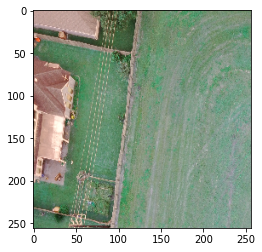

In [ ]:
plt.imshow(train_floodnet_images[0])

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Floodnet'

In [ ]:
training_mask_path =os.getcwd() + '/train/train-label-img'
training_mask_path


'/content/drive/MyDrive/Floodnet/train/train-label-img'

In [ ]:
mask_images= os.listdir(training_mask_path)

In [ ]:
len(mask_images)

1445

In [ ]:
train_floodnet_mask=[]

In [ ]:
train_floodnet_mask=[]
for mask_path in mask_images:
  mask = cv2.imread("/".join((training_mask_path, mask_path)),0)
  mask = mask[0:img_height, 0:img_width]
  mask = cv2.resize(mask, resize_dim)
  i = 0
  j = 0
  y = 0

  for i in range(h_n):
        x=0
        for j in range(w_n):
            mask_crop = mask[y:(y+height), x:(x+width)]
            train_floodnet_mask.append(mask_crop)
            x+=width
        y+=height
train_floodnet_mask = np.array(train_floodnet_mask)

In [ ]:
train_floodnet_mask.shape

(5780, 256, 256)

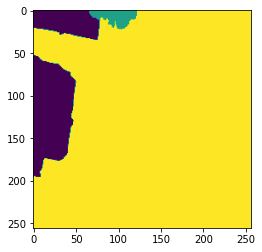

In [ ]:
plt.imshow(train_floodnet_mask[0])

In [ ]:
np.unique(train_floodnet_mask) ## confirmed the 10 classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Eventual Sanity Check for some random image shoutout to DigitalSreeni
# ran_image_num = random.randint(0, len(train_floodnet_images))
# img_ran = train_floodnet_images[ran_image_num]
# mask_ran = train_floodnet_mask[ran_image_num]
# plt.imshow(img_ran)
# print(ran_image_num, img_ran.shape)

Now that train set has been preprocessed we need to move on to test and validation set.. fun!

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Floodnet'

(3072, 4592, 3)


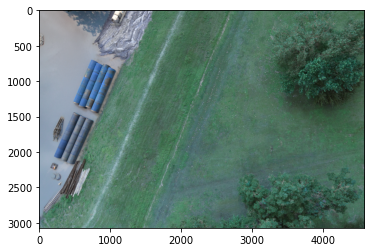

In [ ]:
test_img = cv2.imread('/content/drive/MyDrive/Floodnet/test/test-org-img/10823.jpg')
plt.imshow(test_img)
print(test_img.shape)

In [ ]:
test_images_path = os.getcwd()+ '/test/test-org-img'

In [ ]:
test_images= os.listdir(test_images_path)


In [ ]:
test_floodnet_images =[]
for img_path in test_images:
  img = cv2.imread("/".join((test_images_path,img_path)),1)
  img = img[0:img_height, 0:img_width,:]
  img = cv2.resize(img, resize_dim)
  i=0
  j=0
  y=0
  for i in range(h_n):
    x=0
    for j in range(w_n):
      img_crop= img[y:(y+height),x:(x+width),:]
      test_floodnet_images.append(img_crop)
      x+=width
    y+=height
test_floodnet_images = np.array(test_floodnet_images)

In [ ]:
test_floodnet_images.shape

(1792, 256, 256, 3)

(256, 256, 3)


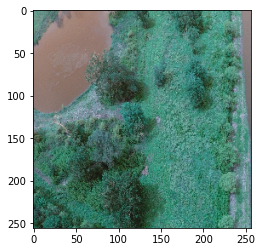

In [ ]:
plt.imshow(test_floodnet_images[0])
print(test_floodnet_images[0].shape)

In [ ]:
test_masks_path = os.getcwd()+'/test/test-label-img'
test_mask_images = os.listdir(test_masks_path)


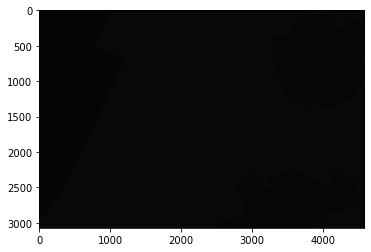

In [ ]:
test_mask_plt=cv2.imread('/content/drive/MyDrive/Floodnet/test/test-label-img/10823_lab.png')
plt.imshow(test_mask_plt) ### Very helpful...

In [ ]:
test_floodnet_mask=[]
for mask_path in test_mask_images:
  mask = cv2.imread("/".join((test_masks_path,mask_path)),0)
  mask = mask[0:img_height, 0:img_width]
  mask = cv2.resize(mask, resize_dim)
  i=0
  j=0
  y=0
  for i in range(h_n):
    x=0
    for j in range(w_n):
      mask_crop = mask[y:(y+height), x:(x+width)]
      test_floodnet_mask.append(mask_crop)
      x+=width
    y+=height
test_floodnet_mask = np.array(test_floodnet_mask)

In [ ]:
validation_images_path = os.getcwd() +'/val/val-org-img'
validation_images = os.listdir(validation_images_path)

In [ ]:
validation_floodnet_images=[]
for img_path in validation_images:
  img = cv2.imread("/".join((validation_images_path,img_path)),1)
  img = img[0:img_height,0:img_width,:]
  img = cv2.resize(img,resize_dim)
  i=0
  j=0
  y=0
  for i in range(h_n):
    x=0
    for j in range(w_n):
      img_crop = img[y:(y+height),x:(x+width),:]
      validation_floodnet_images.append(img_crop)
      x+=width
    y+=height
validation_floodnet_images = np.array(validation_floodnet_images)

In [ ]:
validation_mask_path = os.getcwd() +'/val/val-label-img'
validation_mask = os.listdir(validation_mask_path)

In [ ]:
validation_floodnet_mask=[]
for mask_path in validation_mask:
  mask = cv2.imread("/".join((validation_mask_path, mask_path)),0)
  mask = mask[0:img_height, 0:img_width]
  mask = cv2.resize(mask, resize_dim)
  i=0
  j=0
  y=0
  for i in range(h_n):
    x=0
    for j in range(w_n):
      mask_crop = mask[y:(y+height),x:(x+width)]
      validation_floodnet_mask.append(mask_crop)
      x+=width
    y+=height
validation_floodnet_mask = np.array(validation_floodnet_mask)

In [ ]:
train_floodnet_mask= np.expand_dims(train_floodnet_mask,axis=3)
test_floodnet_mask = np.expand_dims(test_floodnet_mask,axis=3)
validation_floodnet_mask = np.expand_dims(validation_floodnet_mask,axis=3)

In [ ]:
print('Trainset Images:',train_floodnet_images.shape)
print('Trainset Masks:', train_floodnet_mask.shape)
print('Trainset Mask labels:', np.unique(train_floodnet_mask))
print('------------------------------------------------')
print('Testset Images:',test_floodnet_images.shape)
print('Testset Masks:', test_floodnet_mask.shape)
print('Testset Mask labels:', np.unique(test_floodnet_mask))
print('------------------------------------------------')
print('Validationset Images:',validation_floodnet_images.shape)
print('Validationset Masks:', validation_floodnet_mask.shape)
print('Validationset Mask labels:', np.unique(validation_floodnet_mask))

Trainset Images: (5780, 256, 256, 3)
Trainset Masks: (5780, 256, 256, 1)
Trainset Mask labels: [0 1 2 3 4 5 6 7 8 9]
------------------------------------------------
Testset Images: (1792, 256, 256, 3)
Testset Masks: (1792, 256, 256, 1)
Testset Mask labels: [0 1 2 3 4 5 6 7 8 9]
------------------------------------------------
Validationset Images: (1800, 256, 256, 3)
Validationset Masks: (1800, 256, 256, 1)
Validationset Mask labels: [0 1 2 3 4 5 6 7 8 9]


At each pixel, value is from 0-9 which would be fine if we're using RandomForest or traditional ML, but since we're incorporating deep learning and using categorical cross-entropy as loss function or similar it expects input to be OHE each pixel is a vector where values are (0,0,0,1,0,0,0) if pixel belongs to label 3.... 

DECIDED AGAINGST OHE DUE TO MEMORY RESTRICTIONS, STEERING AWAY TO SPARSE CATEGORICAL CROSS ENTROPY AS NO NEED FOR OHE OR LABELENCODING

MODELING TIME... 


In [ ]:
from keras.layers.convolutional.conv2d_transpose import Conv2DTranspose
# DEFINE MODEL
def multi_unet_model(n_classes=10,img_height=256,img_width=256,img_channels=3):
  inputs = Input((img_height,img_width,img_channels))
  ## DonwSampling Encoder
  conv1= Conv2D(64,3,activation='relu',padding = 'same', kernel_initializer = 'he_normal')(inputs)
  conv1= Conv2D(64,3,activation='relu',padding ='same',kernel_initializer ='he_normal')(conv1)
  pool1= MaxPooling2D(pool_size=(2, 2))(conv1)

  conv2= Conv2D(128,3,activation='relu',padding='same', kernel_initializer = 'he_normal')(pool1)
  conv2= Conv2D(128,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv2)
  pool2= MaxPooling2D(pool_size=(2,2))(conv2)

  conv3= Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool2)
  conv3= Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv3)
  pool3= MaxPooling2D(pool_size=(2,2))(conv3)

  conv4= Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool3)
  conv4= Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv4)
  pool4= MaxPooling2D(pool_size=(2,2))(conv4)

  conv5= Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(pool4)
  conv5= Conv2D(1024,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv5)
  ## Time for umsampling bbby.. Lets get Concatnin'

  up6= Conv2DTranspose(512,2, activation='relu',padding='same',kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv5))
  con6= concatenate([conv4,up6], axis = 3)
  conv6= Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(con6)
  conv6= Conv2D(512,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv6)

  up7= Conv2DTranspose(256,2,activation='relu',padding='same',kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv6))
  con7= concatenate([conv3,up7], axis=3)
  conv7= Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(con7)
  conv7= Conv2D(256,3,activation='relu',padding='same',kernel_initializer='he_normal')(conv7)

  up8= Conv2DTranspose(128,2,activation='relu',padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv7))
  con8= concatenate([conv2,up8],axis=3)
  conv8= Conv2D(128,3,activation='relu',padding='same',kernel_initializer='he_normal')(con8)
  conv8= Conv2D(128,3, activation='relu',padding='same',kernel_initializer='he_normal')(conv8)

  up9= Conv2DTranspose(64,2,activation='relu',padding='same',kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv8))
  con9= concatenate([conv1,up9],axis=-1)
  conv9= Conv2D(64,3,activation='relu',padding='same',kernel_initializer='he_normal')(con9)
  conv9= Conv2D(64,3, activation='relu',padding='same',kernel_initializer='he_normal')(conv9)

  ## Final output time
  outputs = Conv2D(n_classes,(1,1), activation = 'softmax',padding='same')(conv9)
  
  model = Model(inputs = [inputs], outputs = [outputs])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['sparse_categorical_accuracy'])

  return model

In [ ]:
model_1 = multi_unet_model()

In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
model_filepath = '/content/drive/MyDrive/model_untuned.hdf5'

In [ ]:
history = model_1.fit(train_floodnet_images, train_floodnet_mask, batch_size=15,verbose=2,epochs=2,validation_data=(validation_floodnet_images,validation_floodnet_mask),
                      callbacks=[keras.callbacks.ModelCheckpoint(filepath=model_filepath, monitor='sparse_categorical_accuracy',save_best_only=True)],shuffle=False)

Epoch 1/2
386/386 - 4929s - loss: 1205.0613 - sparse_categorical_accuracy: 0.4568 - val_loss: 1.8399 - val_sparse_categorical_accuracy: 0.5287 - 4929s/epoch - 13s/step
Epoch 2/2


In [ ]:
scores = model_1.evaluate(test_floodnet_images, test_floodnet_mask)
print("Accuracy: %.2f%%" % (scores[1]*100))